# Titanic - Machine Learning from Disaster!

## This is my first notebook developed for Kaggle Competition
---

In [111]:
import zipfile
import os

if not "train.csv" in os.listdir(os.getcwd()):
    with zipfile.ZipFile("./titanic.zip", 'r') as zf:
        zf.extractall("./")

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv("./train.csv")

In [114]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [115]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
len(df["Cabin"].unique())

148

In [118]:
df[~df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [119]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [120]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [121]:
df["sexo"] = df.apply(lambda x: 1 if x["Sex"]=="male" else 0, axis=1)

In [122]:
homens = df[df["sexo"] == 1]
mulheres = df[df["sexo"] == 0]

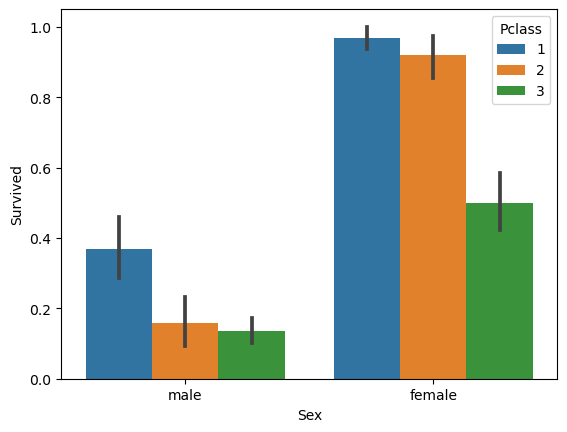

In [123]:
ax = sns.barplot(data=df, x="Sex", y="Survived", hue="Pclass")

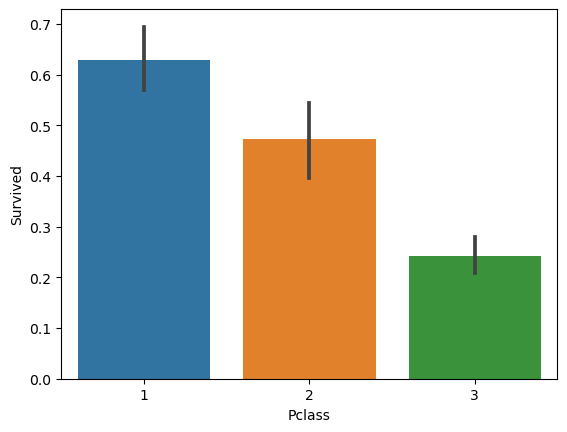

In [124]:
ax = sns.barplot(data=df, x="Pclass", y="Survived")

In [125]:
print("percentage of women who survived: {:.2f} %".format(sum(mulheres["Survived"])/len(mulheres)*100))
print("percentage of men who survived: {:.2f} %".format(sum(homens["Survived"])/len(homens)*100))

percentage of women who survived: 74.20 %
percentage of men who survived: 18.89 %


In [126]:
df["sexo"] = df.apply(lambda x: 1 if x["Sex"]=="male" else 0, axis=1)

In [127]:
homens = df[df["sexo"] == 1]
mulheres = df[df["sexo"] == 0]

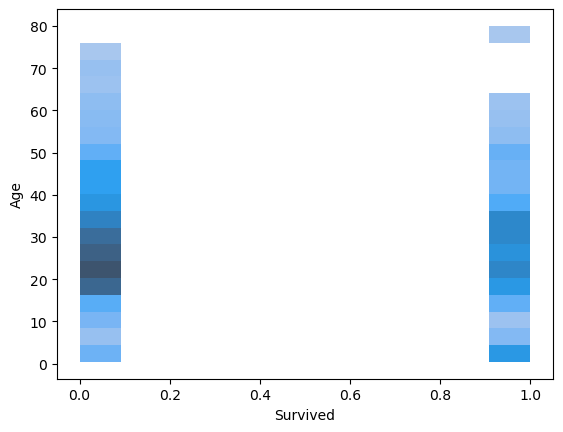

In [128]:
ax = sns.histplot(data=df, x="Survived", y="Age")

In [129]:
df['Age'].fillna(round(df['Age'].mean(),0), inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  sexo         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [131]:
df = df.loc[df["Embarked"].dropna().index, :].copy()

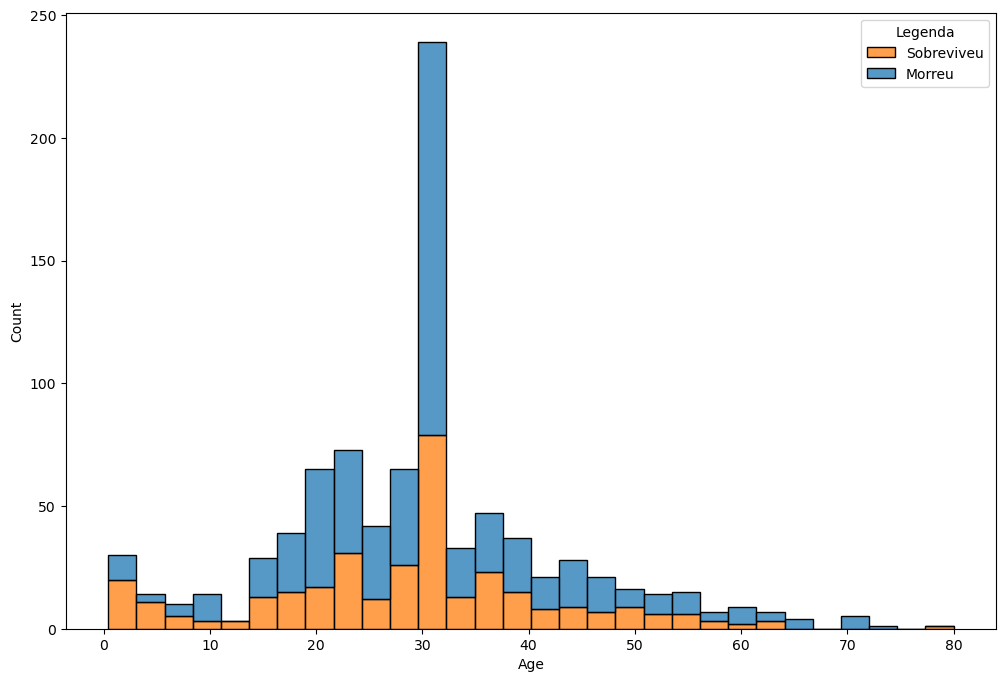

In [132]:
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", legend=False).legend(title="Legenda", labels=["Sobreviveu", "Morreu"])

In [133]:
pd.cut(df["Age"], bins=20)

0      (20.315, 24.294]
1       (36.231, 40.21]
2      (24.294, 28.273]
3      (32.252, 36.231]
4      (32.252, 36.231]
             ...       
886    (24.294, 28.273]
887    (16.336, 20.315]
888    (28.273, 32.252]
889    (24.294, 28.273]
890    (28.273, 32.252]
Name: Age, Length: 889, dtype: category
Categories (20, interval[float64, right]): [(0.34, 4.399] < (4.399, 8.378] < (8.378, 12.357] < (12.357, 16.336] ... (64.084, 68.063] < (68.063, 72.042] < (72.042, 76.021] < (76.021, 80.0]]

In [134]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 30.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [148]:
bins = pd.IntervalIndex.from_tuples([
    (0., 5.), (5., 10.), (10., 15.),
    (15., 20.), (20., 25.), (25., 30.),
    (30., 35.), (35., 40.), (40., 45.),
    (45., 50.), (50., 55.), (55., 60.),
    (60., 65.), (65., 70.), (70., 75.),
    (75., 80.)])
df["classe_cut"] = pd.cut(
    df["Age"], range(0, 81, 5), include_lowest=False   
)

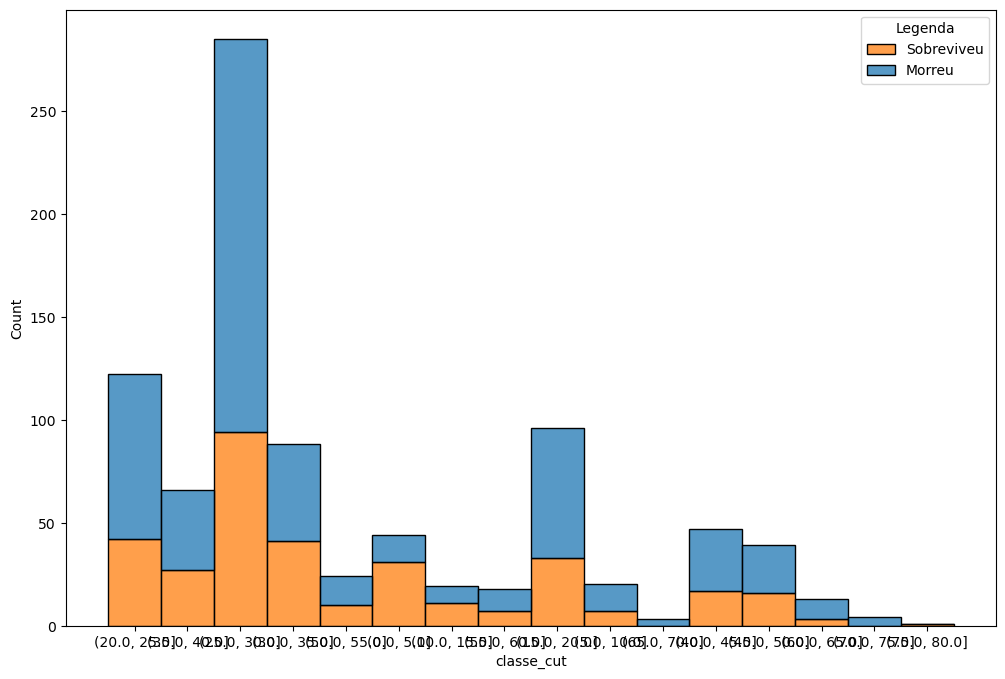

In [145]:
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x="classe_cut", hue="Survived", multiple="stack", legend=False).legend(title="Legenda", labels=["Sobreviveu", "Morreu"])

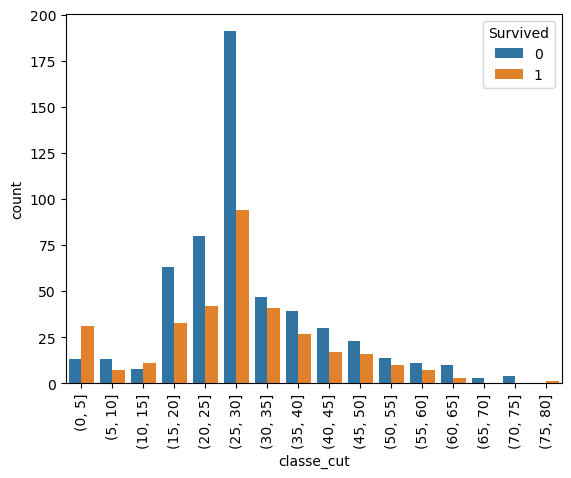

In [153]:
ax = sns.countplot(data=df, x='classe_cut')
ax.tick_params(axis='x', labelrotation=90)

In [157]:
pd.pivot_table(
    data=df,
    index="classe_cut",
    aggfunc='count',
)["Survived"]

classe_cut
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    285
(30, 35]     88
(35, 40]     66
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     13
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Survived, dtype: int64

In [160]:
prop = pd.DataFrame(pd.pivot_table(
    data=df[df["Survived"]==1],
    index="classe_cut",
    aggfunc='count',
)["Survived"])

In [161]:
prop["proporção"] = prop["Survived"]/pd.pivot_table(
    data=df,
    index="classe_cut",
    aggfunc='count',
)["Survived"]*100

In [162]:
prop

,Survived,proporção
classe_cut,,
"(0, 5]",31,70.454545
"(5, 10]",7,35.000000
"(10, 15]",11,57.894737
"(15, 20]",33,34.375000
"(20, 25]",42,34.426230
"(25, 30]",94,32.982456
"(30, 35]",41,46.590909
"(35, 40]",27,40.909091
"(40, 45]",17,36.170213


In [168]:
prop = prop.reset_index()

In [170]:
prop["classe_cut"] = prop["classe_cut"].astype(str)

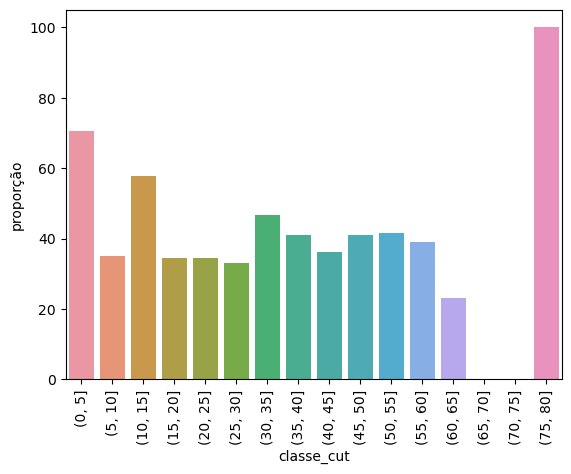

In [177]:
ax = sns.barplot(data=prop, x='classe_cut', y='proporção').tick_params(axis='x', labelrotation=90)